In [1]:
# 그래프, 수학 기능 추가
# Add graph and math features
import pylab as py
import numpy as np
import numpy.linalg as nl
# 기호 연산 기능 추가
# Add symbolic operation capability
import sympy as sy



# 벡터<br>Vector

벡터는 크기만이 아니라 방향도 가지는 양이다.<br>
Vectors is a quantity having both its magnitude and its direction.

벡터에 관해 아래 비디오 링크를 참고할 수 있다. (5:48)<br>
Regarding the vector, you can check the following link. (5:48)<br>
<br>
[![칸 아카데미 | 벡터와 벡터 공간 | 벡터와 공간 | 선형대수를 위한 벡터 소개<br>Khan Academy | Linear Algebra | Vectors and spaces | Vector intro for linear algebra](https://i.ytimg.com/vi/br7tS1t2SFE/hqdefault.jpg)](https://www.youtube.com/watch?v=br7tS1t2SFE)

예를 들어 2차원 벡터를 생각해 보자.<br>
For example, let's think about two-dimensional vectors (2D vectors).

In [2]:
# ref : https://www.youtube.com/watch?v=8QihetGj3pg
a = np.array((6, -2))
b = np.array((-4, 4))

In [3]:
a

array([ 6, -2])

In [4]:
b

array([-4,  4])

위 2차원 벡터를 한번 그려 보자<br>
Let's plot the 2D vectors above.

In [5]:
def draw_2dvec(x, y, x0=0, y0=0, color='k', name=None):
    py.quiver(x0, y0, x, y, color=color, angles='xy', scale_units='xy', scale=1)
    if name is not None:
        if not name.startswith('$'):
            vec_str = '$\\vec{%s}$' % name
        else:
            vec_str = name
        py.text(0.5 * x + x0, 0.5 * y + y0, vec_str)

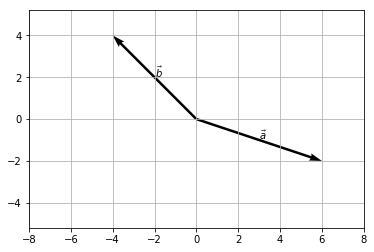

In [6]:
draw_2dvec(a[0], a[1], name='a')
draw_2dvec(b[0], b[1], name='b')

py.axis('equal')
py.xlim((-8, 8))
py.ylim((-8, 8))
py.grid(True)

## 벡터 합<br>Sum of two vectors

두 벡터를 더해 보자.<br>Let's add two vectors.

In [7]:
a_plus_b = a + b

In [8]:
a_plus_b

array([2, 2])

이 벡터의 합을 그려보자.<br>
Let's draw this sum of vectors.

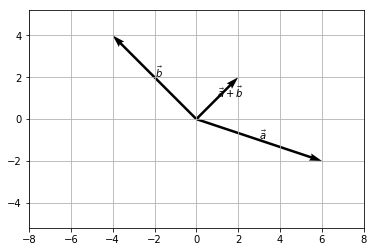

In [9]:
draw_2dvec(a[0], a[1], name='a')
draw_2dvec(b[0], b[1], name='b')
draw_2dvec(a_plus_b[0], a_plus_b[1], name='$\\vec{a}+\\vec{b}$')

py.axis('equal')
py.xlim((-8, 8))
py.ylim((-8, 8))
py.grid(True)

어떻게 해서 벡터의 합은 이렇게 된 것일까? $\vec{b}$ 벡터의 시작점을 $\vec{a}$ 벡터의 끝점으로 옮겨 보자.<br>
How come this vector sum came up like this?  Let's move the starting point of $\vec{b}$ to the starting point of $\vec{a}$.

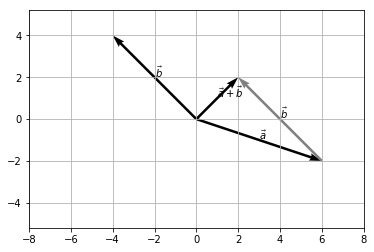

In [10]:
draw_2dvec(a[0], a[1], name='a')
draw_2dvec(b[0], b[1], a[0], a[1], color=(0.5, 0.5, 0.5), name='b')
draw_2dvec(b[0], b[1], name='b')
draw_2dvec(a_plus_b[0], a_plus_b[1], name='$\\vec{a}+\\vec{b}$')

py.axis('equal')
py.xlim((-8, 8))
py.ylim((-8, 8))
py.grid(True)

여기서 $\vec{a}$, $\vec{b}$ 그리고 $\vec{a} + \vec{b}$ 가 삼각형을 이룬다는 것을 알 수 있다.<br>
Here, you can see that $\vec{a}$, $\vec{b}$, and $\vec{a} + \vec{b}$ form a triangle.

$\vec{b}$의 시작점을 $\vec{a}$의 끝점으로 옮긴 결과, 회색 벡터의 끝점이 $\vec{a} + \vec{b}$ 의 끝점과 같다.<br>
As the result of moving the start point of $\vec{b}$ to the end point of $\vec{a}$, the end points of the gray vector and $\vec{a} + \vec{b}$ are identicial.

### 교환법칙<br>Commutative Law

벡터의 합의 순서를 바꾸어 보자.<br>Let's change the order of addition.

In [11]:
b_plus_a = b + a

In [12]:
b_plus_a

array([2, 2])

이는 $\vec{a}+\vec{b}$와 같다.<br>This is the same as $\vec{a}+\vec{b}$.

이번에도 시각화 해 보자.<br>Let's visualize again.

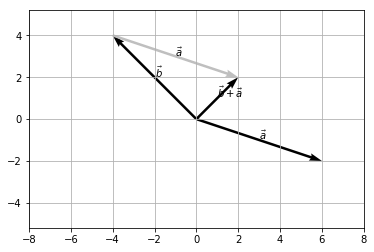

In [13]:
draw_2dvec(a[0], a[1], name='a')
draw_2dvec(b[0], b[1], name='b')
draw_2dvec(a[0], a[1], b[0], b[1], color=(0.75, 0.75, 0.75), name='a')
draw_2dvec(b_plus_a[0], b_plus_a[1], name='$\\vec{b}+\\vec{a}$')

py.axis('equal')
py.xlim((-8, 8))
py.ylim((-8, 8))
py.grid(True)

비슷하게, $\vec{a}$, $\vec{b}$ 그리고 $\vec{b} + \vec{a}$ 가 삼각형을 이룬다는 것을 알 수 있다.<br>
Similarly, you can see that $\vec{a}$, $\vec{b}$, and $\vec{b} + \vec{a}$ form a triangle.

이번에는 $\vec{a}$의 시작점을 $\vec{b}$의 끝점으로 옮겨 보았다. 덧셈의 순서와는 상관 없이, 회색 벡터의 끝점이 $\vec{b} + \vec{a}$ 의 끝점과 일치하는 것을 확인할 수 있다.<br>
This time, we moved the start point of $\vec{a}$ to the end point of $\vec{b}$. We can confirm that regardless of the order of addition, the end points of the gray vector and $\vec{a} + \vec{b}$ are identicial.

두 방식을 모두 표시해 보자.<br>Let's indicate both ways.

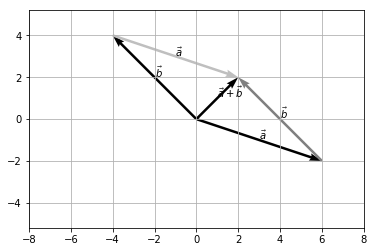

In [14]:
draw_2dvec(a[0], a[1], name='a')
draw_2dvec(b[0], b[1], name='b')
draw_2dvec(a[0], a[1], b[0], b[1], color=(0.75, 0.75, 0.75), name='a')
draw_2dvec(b[0], b[1], a[0], a[1], color=(0.5, 0.5, 0.5), name='b')
draw_2dvec(b_plus_a[0], b_plus_a[1], name='$\\vec{a}+\\vec{b}$')

py.axis('equal')
py.xlim((-8, 8))
py.ylim((-8, 8))
py.grid(True)

벡터 합은 $\vec{a}$와 $\vec{b}$가 이루는 평행 사변형의 한 대각선임을 알 수 있다.<br>
We can see that the vector sum is one of diagonals of the parallogram of $\vec{a}$'s and $\vec{b}$'s.

## 스칼라와 벡터의 곱<br>Product of a Scalar and a Vector

벡터에 어떤 스칼라 값을 곱해 보자.<br>Let's multiply a scalar value to a vector.

In [15]:
x = np.array((2, 1))
alpha = 3
alpha_x = alpha * x

In [16]:
alpha_x

array([6, 3])

그림으로 표시해 보자.<br>Let's draw.

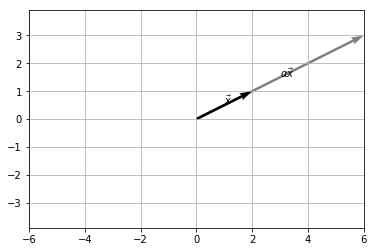

In [17]:
draw_2dvec(alpha_x[0], alpha_x[1], name='$\\alpha\\vec{x}$', color=(0.5, 0.5, 0.5))
draw_2dvec(x[0], x[1], name='x')

py.axis('equal')
py.xlim((-6, 6))
py.ylim((-6, 6))
py.grid(True)

방향은 바뀌지 않고 크기만 달라지는 것을 알 수 있다.<br>
The direction does not change but the magnitude changes.

스칼라 값이 음인 경우는 어떠할까?<br>What if scalar value is negative?

In [18]:
x = np.array((2, 1))
beta = -1
beta_x = beta * x

In [19]:
beta_x

array([-2, -1])

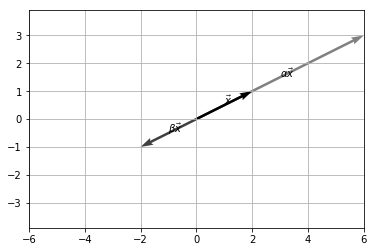

In [20]:
draw_2dvec(alpha_x[0], alpha_x[1], name='$\\alpha\\vec{x}$', color=(0.5, 0.5, 0.5))
draw_2dvec(beta_x[0], beta_x[1], name='$\\beta\\vec{x}$', color=py.ones((1, 3)) * 0.25)
draw_2dvec(x[0], x[1], name='x')

py.axis('equal')
py.xlim((-6, 6))
py.ylim((-6, 6))
py.grid(True)

음의 스칼라를 곱하면 방향이 반대로 된다는 것을 알 수 있다.<br>
In case of the negative scalar, the direction becomes the opposite.

## 벡터의 차<br>Difference of two vectors

어떤 벡터 $\vec{b}$를 다른 벡터 $\vec{a}$에서 빼는 셈에 대해 생각해 보자.<br>
Let's think about subtracting a vector $\vec{b}$ from another vector $\vec{a}$.

In [21]:
a_minus_b = a - b

In [22]:
a_minus_b

array([10, -6])

그림으로 표시보자.<br>
Let's visualize.

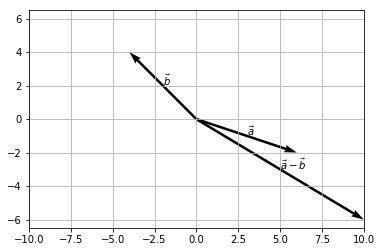

In [23]:
draw_2dvec(a[0], a[1], name='a')
draw_2dvec(b[0], b[1], name='b')
draw_2dvec(a_minus_b[0], a_minus_b[1], name='$\\vec{a}-\\vec{b}$')

py.axis('equal')
py.xlim((-10, 10))
py.ylim((-10, 10))
py.grid(True)

이번에는 어떻게 해서 벡터의 차가 이렇게 된 것인지 알아 보자. $\vec{b}$ 벡터에 -1을 곱해서 시작점을 $\vec{a}$ 벡터의 끝점으로 옮겨 보자.<br>
Let's figure out the vector subtraction.  Let's multiply by -1 to $\vec{b}$ and move the starting point to the end point of $\vec{a}$.

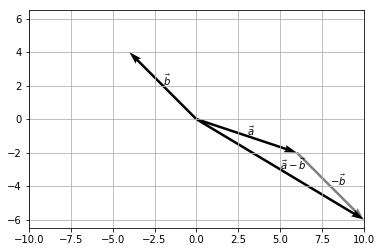

In [24]:
draw_2dvec(a[0], a[1], name='a')
draw_2dvec(-b[0], -b[1], a[0], a[1], color=(0.5, 0.5, 0.5), name='$-\\vec{b}$')
draw_2dvec(b[0], b[1], name='b')
draw_2dvec(a_minus_b[0], a_minus_b[1], name='$\\vec{a}-\\vec{b}$')

py.axis('equal')
py.xlim((-10, 10))
py.ylim((-10, 10))
py.grid(True)

벡터 뺄셈은 부호를 바꾸어 더하는 것과 같다.<br>Subtracting a vector is equivalent to changing the sign of the vector and adding it.

 이번에는 $\vec{a}-\vec{b}$ 의 시작점을 $\vec{b}$의 끝점으로 옮겨 보자.<br>
 This time, let's move the start point of $\vec{a}-\vec{b}$ to the end point of $\vec{b}$.

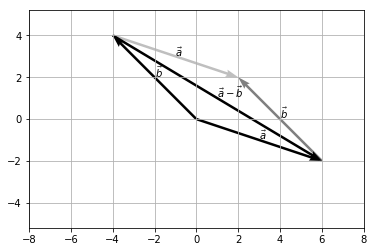

In [25]:
draw_2dvec(a[0], a[1], name='a')
draw_2dvec(b[0], b[1], name='b')
draw_2dvec(a[0], a[1], b[0], b[1], color=(0.75, 0.75, 0.75), name='a')
draw_2dvec(b[0], b[1], a[0], a[1], color=(0.5, 0.5, 0.5), name='b')
draw_2dvec(a_minus_b[0], a_minus_b[1], b[0], b[1], name='$\\vec{a}-\\vec{b}$')

py.axis('equal')
py.xlim((-8, 8))
py.ylim((-8, 8))
py.grid(True)

이는 다음을 뜻한다.<br>
This means the following.

$$
\vec{b}+\left(\vec{a}-\vec{b}\right)=\vec{a}
$$

또한, $\vec{a}-\vec{b}$ 도 $\vec{a}$와 $\vec{b}$가 이루는 평행 사변형의 다른 대각선임을 알 수 있다.<br>
We can also see that the vector subtraction is the other diagonal of the parallogram of $\vec{a}$'s and $\vec{b}$'s.

In [27]:

import pylab as py
import numpy as np
import numpy.linalg as nl
import sympy as sy

a = np.array((7,-4))
b = np.array((3,-3))

In [28]:
a

array([ 7, -4])

In [29]:
b

array([ 3, -3])

In [ ]:
*위에서 보인 예와 같이 두 벡터를 그려보시오.

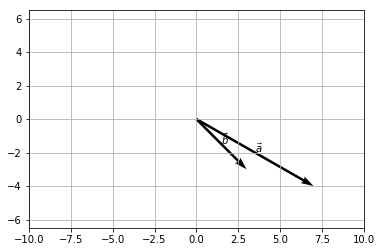

In [30]:
draw_2dvec(a[0],a[1],name='a')
draw_2dvec(b[0],b[1],name='b')

py.axis('equal')
py.xlim((-10,10))
py.ylim((-10,10))
py.grid(True)

In [ ]:
*두 벡터의 합과 두 벡터를 함께 그려보시오.

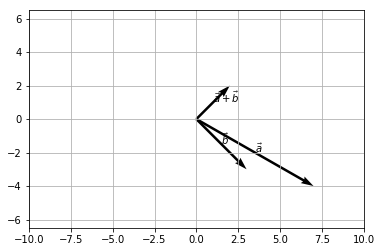

In [31]:
draw_2dvec(a[0],a[1],name='a')
draw_2dvec(b[0],b[1],name='b')
draw_2dvec(a_plus_b[0],a_plus_b[1],name='$\\vec{a}+\\vec{b}$')

py.axis('equal')
py.xlim((-10,10))
py.ylim((-10,10))
py.grid(True)

In [ ]:
*두 벡터와 두 벡터의 합, 두 벡터의 차를 함께 그려 보시오.

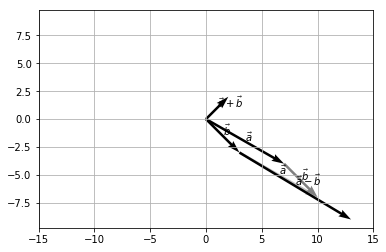

In [36]:
draw_2dvec(a[0],a[1],name='a')
draw_2dvec(b[0],b[1],name='b')
draw_2dvec(a[0],a[1],b[0],b[1],color=(0.75,0.75,0.75),name='a')
draw_2dvec(b[0],b[1],a[0],a[1],color=(0.5,0.5,0.5),name='b')
draw_2dvec(a_plus_b[0],a_plus_b[1],name='$\\vec{a}+\\vec{b}$')
draw_2dvec(a_minus_b[0],a_minus_b[1],b[0],b[1],name='$\\vec{a}-\\vec{b}$')

py.axis('equal')
py.xlim((-15,15))
py.ylim((-15,15))
py.grid(True)